In [71]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import Imputer
import seaborn as sns

In [72]:
# For data exploration
def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , hm_dataset[ var ].max() ) )
    facet.add_legend()
       
def plot_correlation_map( df ):
    corr = hm_dataset.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

In [73]:
# Importing the dataset
dataset_1 = pd.read_csv('cleaned_hm.csv')
dataset_2 = pd.read_csv('demographic.csv')
dataset_2.head()

,wid,age,country,gender,marital,parenthood
0,1,37.0,USA,m,married,y
1,2,29.0,IND,m,married,y
2,3,25,IND,m,single,n
3,4,32,USA,m,married,y
4,5,29,USA,m,married,y


In [74]:
#Merging the two data sets
hm_dataset = pd.merge(dataset_1 , dataset_2)

#dropping columns which won't be needed for analysis
hm_dataset.drop(['original_hm', 'cleaned_hm','modified','num_sentence','ground_truth_category','reflection_period','hmid'], axis=1, inplace=True)
hm_dataset.head()

,wid,predicted_category,age,country,gender,marital,parenthood
0,2053,affection,35,USA,m,single,n
1,2053,leisure,35,USA,m,single,n
2,2053,leisure,35,USA,m,single,n
3,2053,bonding,35,USA,m,single,n
4,2053,leisure,35,USA,m,single,n


In [75]:
#Arranging the matrix and putting dependent variable in the end
hm_dataset = hm_dataset[['wid', 'age', 'gender', 'marital', 'parenthood', 'country', 'predicted_category']]

In [76]:
#Preparing to convert categorical values to numerical values
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_gender = LabelEncoder()
labelencoder_parenthood = LabelEncoder()
labelencoder_marital = LabelEncoder()
labelencoder_country = LabelEncoder()
labelencoder_predicted_category = LabelEncoder()

In [77]:
hm_dataset.count()

wid                   100535
age                   100442
gender                100456
marital               100378
parenthood            100457
country               100332
predicted_category    100535
dtype: int64

In [78]:
#Convert nan to mode values for all columns
hm_dataset['gender'] = hm_dataset.gender.fillna( hm_dataset.gender.mode()[0])
hm_dataset['parenthood'] = hm_dataset.parenthood.fillna( hm_dataset.parenthood.mode()[0])
hm_dataset['marital'] = hm_dataset.marital.fillna( hm_dataset.marital.mode()[0])
hm_dataset['country'] = hm_dataset.country.fillna( hm_dataset.country.mode()[0])

In [79]:
#Encode the columns

# For attribure "gender"
# f , m , o = 0, 1, 2
hm_dataset["gender"] = labelencoder_gender.fit_transform(hm_dataset["gender"])
gender_codes  = labelencoder_gender.inverse_transform([0,1,2]);

# For attribure "parenthood"
# n , y = 0, 1
hm_dataset["parenthood"] = labelencoder_parenthood.fit_transform(hm_dataset["parenthood"])
parenthood_codes= labelencoder_parenthood.inverse_transform([0,1]);

# For attribure "marital"
# 'divorced', 'married', 'separated', 'single', 'widowed' = 0, 1, 2, 3, 4
hm_dataset["marital"] = labelencoder_marital.fit_transform(hm_dataset["marital"])
marital_codes= labelencoder_marital.inverse_transform([0,1,2,3,4]);

# For attribure "predicted_category"
# 'affection' ,'enjoy-the-moment', 'nature', '', '', '', '' = 0, 1, 2, 3, 4, 5, 6
hm_dataset["predicted_category"] = labelencoder_predicted_category .fit_transform(hm_dataset["predicted_category"])
predicted_codes= labelencoder_predicted_category.inverse_transform([0,1,2,3,4,5,6]);

hm_dataset.predicted_category.unique()

array([1, 5, 2, 0, 3, 4, 6])

In [80]:
hm_dataset["country"] = labelencoder_country.fit_transform(hm_dataset["country"])


hm_age = pd.Series(hm_dataset.age)

hm_dataset = hm_dataset[['country', 'gender', 'parenthood', 'marital','predicted_category']]

hm_age = pd.to_numeric(hm_age, errors='coerce')

hm_dataset = pd.concat( [ hm_age, hm_dataset ] , axis=1 )

#Fill nan with mean
hm_dataset['age'] = hm_dataset.age.fillna(int(hm_dataset.age.mean()))

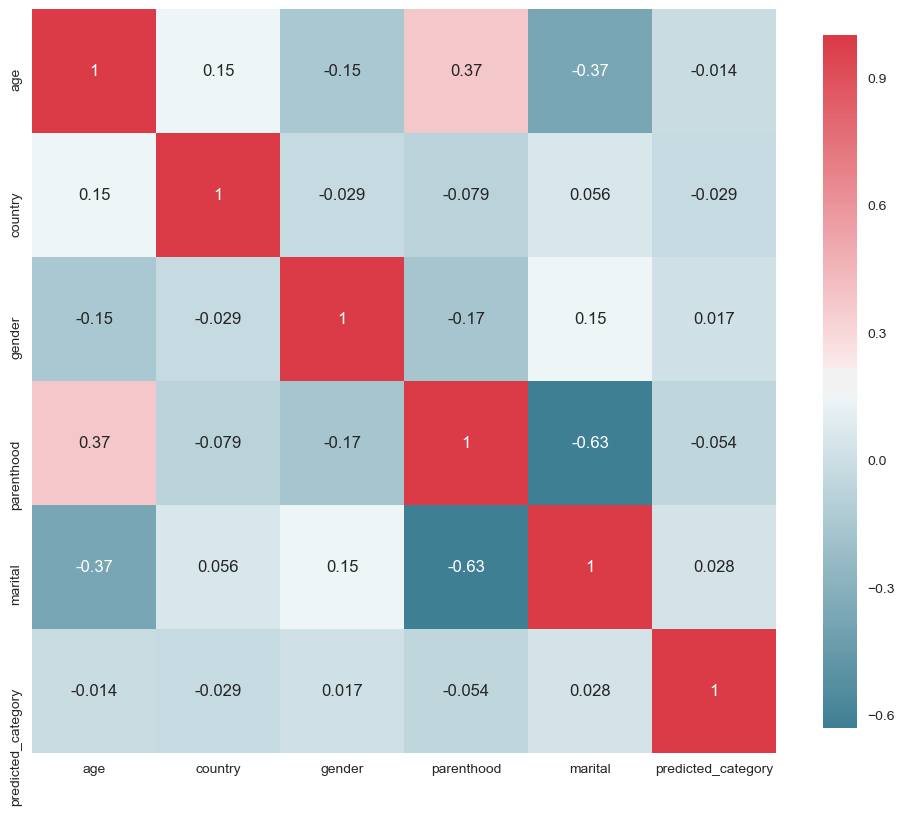

In [81]:
plot_correlation_map( hm_dataset )

plt.show()


In [45]:
plot_distribution( hm_dataset , var = 'age' , target = 'predicted_category' , row = 'gender' )

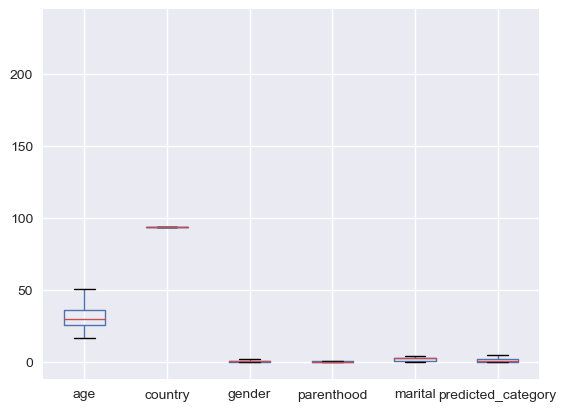

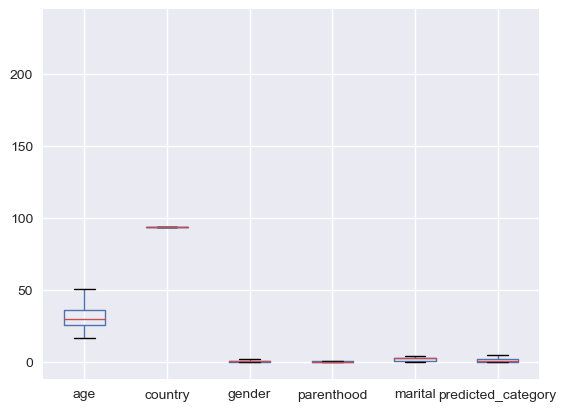

In [70]:
hm_dataset.plot.box()
plt.show()

In [15]:
import matplotlib.pyplot as plt; plt.rcdefaults()

